In [1]:
!pip install nltk wordcloud

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaide\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jaide\AppData\Roaming\nltk_data...


True

In [4]:
file_path = r"D:\.pyy\CT TECH\text.csv"
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [5]:
df['label'].value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

In [6]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

df['clean_text'] = df['text'].apply(clean_text)

In [7]:
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
vectorizer = TfidfVectorizer(max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [10]:
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.850051582255704

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     24238
           1       0.80      0.97      0.88     28214
           2       0.95      0.49      0.64      6911
           3       0.93      0.79      0.86     11463
           4       0.89      0.73      0.80      9542
           5       0.95      0.31      0.47      2994

    accuracy                           0.85     83362
   macro avg       0.90      0.71      0.76     83362
weighted avg       0.86      0.85      0.84     83362



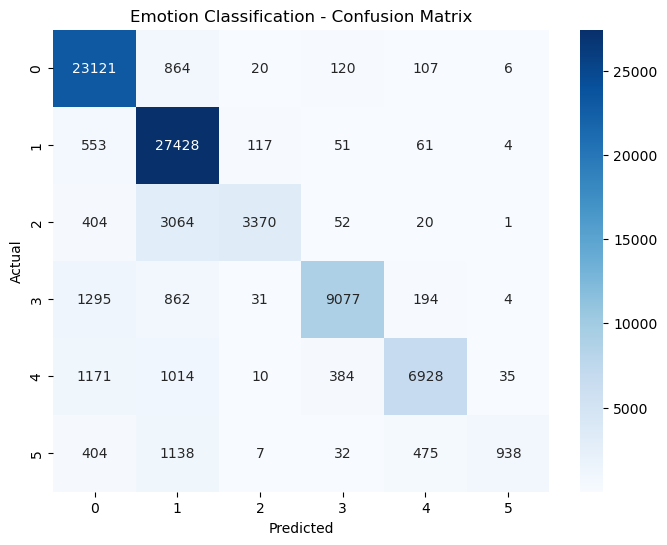

In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Emotion Classification - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

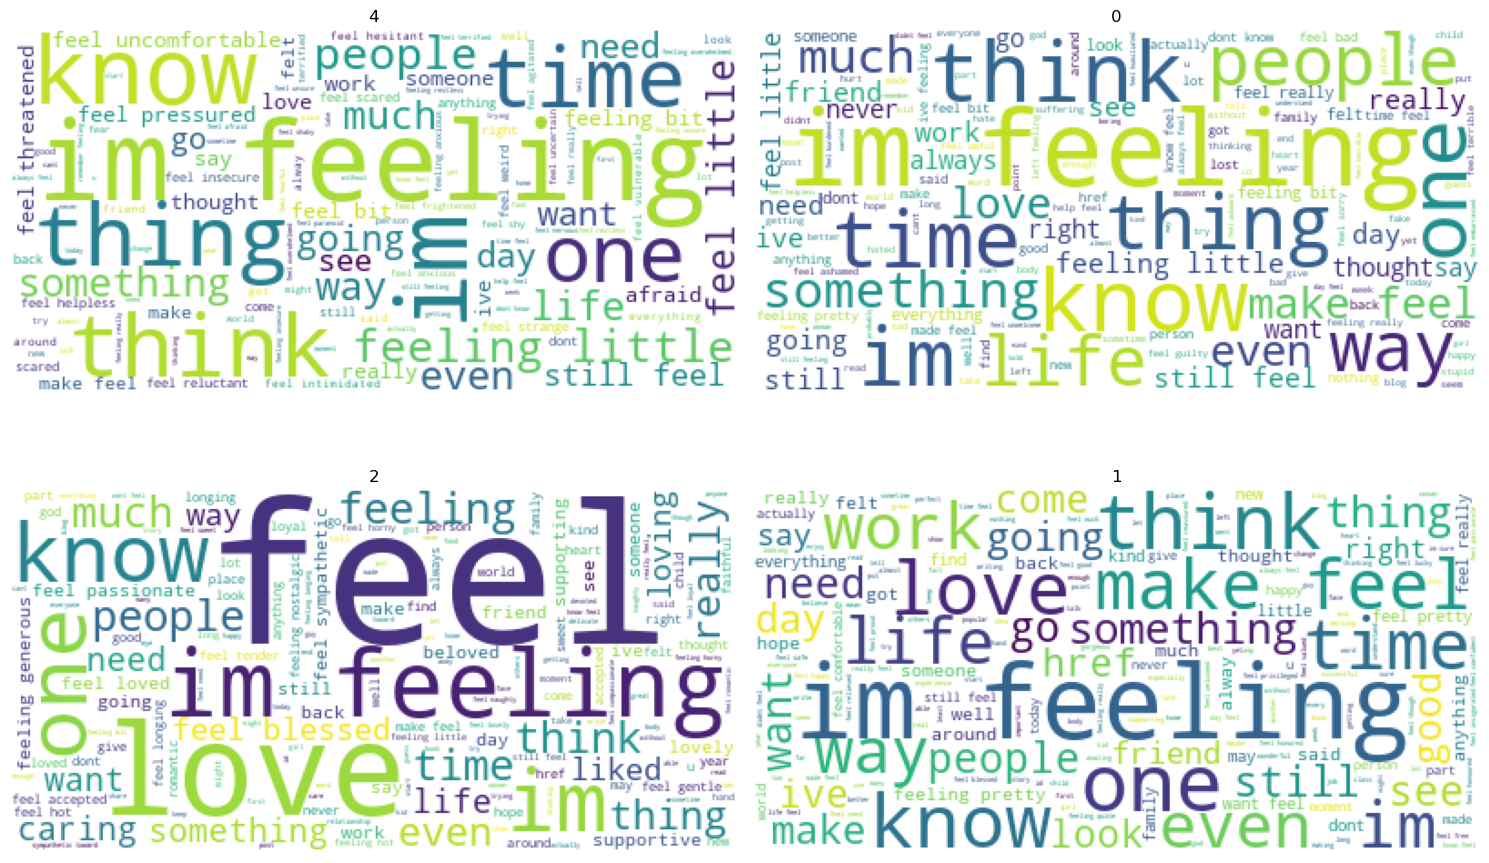

In [12]:
emotions = df['label'].unique()

plt.figure(figsize=(15,10))

for i, emotion in enumerate(emotions[:4], 1):
    text_data = " ".join(df[df['label'] == emotion]['clean_text'])
    
    plt.subplot(2,2,i)
    wc = WordCloud(background_color='white').generate(text_data)
    plt.imshow(wc)
    plt.title(emotion)
    plt.axis("off")

plt.tight_layout()
plt.show()